Enter model name (e.g., 'LinearRegression', 'RandomForestRegressor'):  RandomForestRegressor
Enter number of graphs to generate:  4


Mean Squared Error: 1.3503486111111112
Predictions: [5.66 8.84 3.68 6.83 3.29 1.19 4.99 2.31 4.98 4.29 1.81 6.53 4.46 0.03
 4.05 2.46 3.06 6.47 7.41 7.01 4.59 3.16 7.35 6.87 5.07 6.03 4.02 4.97
 6.   3.48 4.18 7.11 1.5  3.98 4.17 5.99 8.96 3.98 6.85 6.02 6.   5.61
 1.2  2.98 4.69 1.02 3.19 0.12 6.   4.96 5.01 1.02 6.05 4.98 5.99 0.19
 4.17 0.21 0.82 1.08 1.27 3.99 5.09 2.14 4.17 4.9  6.95 0.64 6.74 5.37
 8.46 6.33 5.11 5.49 6.85 0.   4.23 4.81 6.8  6.32 8.91 1.51 1.98 3.28
 7.77 0.   5.78 4.07 4.03 5.57 1.43 3.55 7.48 3.08 5.61 2.36 7.   2.89
 3.99 5.42 3.45 3.49 4.81 3.5  1.03 4.36 5.03 8.66 3.98 2.06 6.76 6.65
 4.15 4.11 1.09 8.67 4.9  6.6  8.63 6.73 2.06 5.74 5.3  4.31 0.98 5.66
 4.65 6.84 4.98 7.38 5.89 4.97 5.83 5.96 0.   6.   6.02 4.04 2.11 7.97
 0.   8.74 3.87 5.58 7.77 6.51 5.91 8.97 0.51 4.3  5.04 5.7  6.02 4.29
 6.   3.98 3.36 7.63 3.37 5.63 6.76 2.41 8.92 0.35 3.75 4.95 5.85 5.99
 5.13 6.87 8.71 6.02 4.04 2.89 1.07 5.2  6.38 5.52 2.14 2.06 3.81 6.63
 7.93 0.   3.53 2.65 2.45

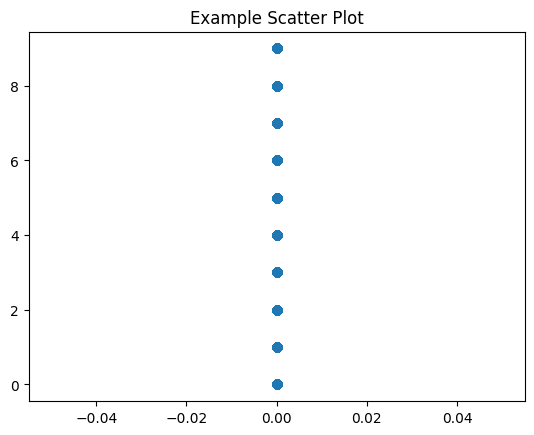

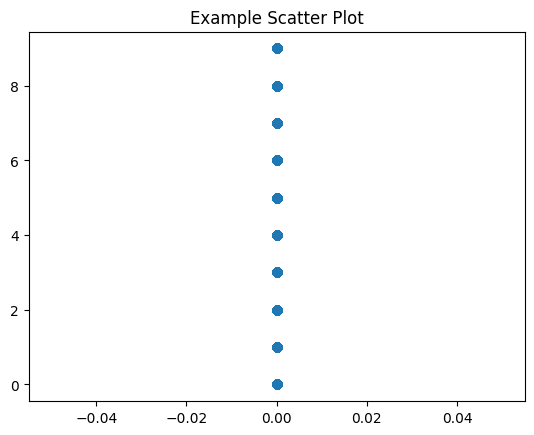

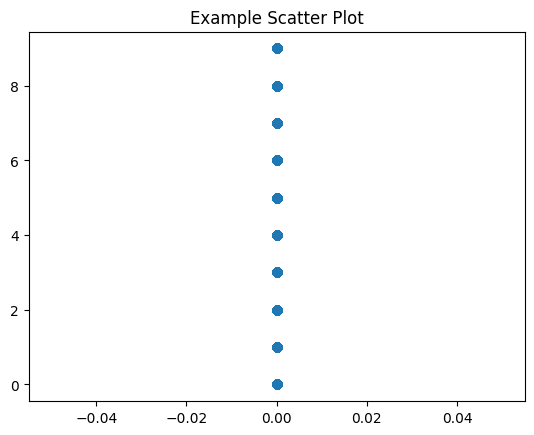

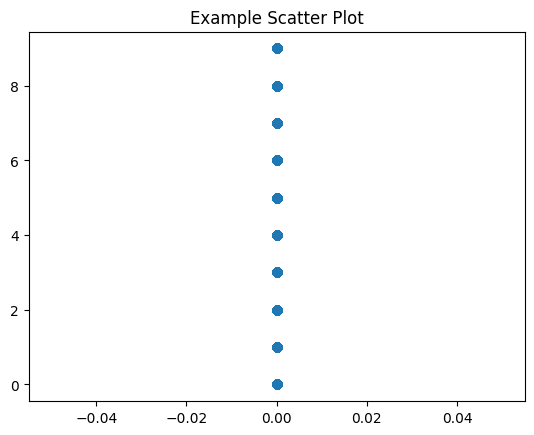

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import all_estimators
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_digits  # Example dataset, replace with user input

class EstimatorManager:
    def __init__(self):
        self.estimators = self._get_estimators()
        self.model = None
        self.X = None
        self.y = None

    def _get_estimators(self):
        """
        Fetches all scikit-learn estimators.

        Returns:
        - list: List of (name, class) tuples of all estimators.
        """
        all_estimators_dict = all_estimators()
        estimators = [(name, EstimatorClass) for name, EstimatorClass in all_estimators_dict]
        return estimators

    def select_model(self, model_name):
        """
        Selects a scikit-learn model by name.

        Parameters:
        - model_name (str): Name of the scikit-learn estimator.

        Raises:
        - ValueError: If the specified model name is not found.

        Returns:
        - bool: True if model selection is successful.
        """
        for name, estimator_class in self.estimators:
            if model_name.lower() == name.lower():
                self.model = estimator_class()
                return True
        raise ValueError(f"Model '{model_name}' not found in scikit-learn.")

    def provide_dataset(self, X, y):
        """
        Accepts a dataset for model training.

        Parameters:
        - X (array-like): Feature dataset.
        - y (array-like): Target values.

        Returns:
        - bool: True if dataset is successfully provided.
        """
        self.X = X
        self.y = y
        return True

    def make_graphs(self, num_graphs):
        """
        Generates example graphs using the dataset.

        Parameters:
        - num_graphs (int): Number of graphs to generate.

        Returns:
        - list: List of generated graphs (matplotlib figures).
        """
        if self.X is None or self.y is None:
            raise ValueError("Dataset not provided.")
        
        graphs = []
        for _ in range(num_graphs):
            # Example graph generation (replace with actual graphing logic)
            fig, ax = plt.subplots()
            ax.scatter(self.X[:, 0], self.y)
            ax.set_title("Example Scatter Plot")
            graphs.append(fig)
        
        return graphs

    def train_and_predict(self):
        """
        Trains the selected model on the provided dataset and makes predictions.

        Returns:
        - array-like: Predicted values.
        """
        if self.model is None or self.X is None or self.y is None:
            raise ValueError("Model or dataset not provided.")

        # Example: Train-test split for demonstration
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)

        # Train the model
        self.model.fit(X_train, y_train)

        # Make predictions
        y_pred = self.model.predict(X_test)

        # Example evaluation (replace with user's specific needs)
        mse = mean_squared_error(y_test, y_pred)
        print(f"Mean Squared Error: {mse}")

        return y_pred

if __name__ == "__main__":
    # Example usage script

    # Initialize EstimatorManager
    estimator_manager = EstimatorManager()

    # Example: Select model
    model_name = input("Enter model name (e.g., 'LinearRegression', 'RandomForestRegressor'): ")
    estimator_manager.select_model(model_name)

    # Example: Provide dataset (replace with user input logic)
    digits = load_digits()
    X, y = digits.data, digits.target
    estimator_manager.provide_dataset(X, y)

    # Example: Generate graphs (replace with user input logic)
    num_graphs = int(input("Enter number of graphs to generate: "))
    graphs = estimator_manager.make_graphs(num_graphs)
    for i, graph in enumerate(graphs):
        graph.savefig(f'graph_{i}.png')  # Save or display the graphs

    # Example: Train and predict
    try:
        predictions = estimator_manager.train_and_predict()
        print("Predictions:", predictions)
    except ValueError as e:
        print(e)


In [4]:
from sklearn.utils import all_estimators
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_openml

def get_estimators(estimator_type):
    """
    Fetches all scikit-learn estimators of a specified type.

    Parameters:
    - estimator_type (str): Type of estimator ('classifier' or 'regressor').

    Returns:
    - list: List of (name, class) tuples of all estimators of the specified type.
    """
    if estimator_type not in ['classifier', 'regressor']:
        raise ValueError("Invalid estimator type. Must be 'classifier' or 'regressor'.")
    
    estimators = all_estimators(type_filter=estimator_type)
    return list(estimators)

def perform_train_test_split(X, y, test_size=0.2, random_state=None):
    """
    Performs train-test split on the data.

    Parameters:
    - X (array-like): Feature dataset.
    - y (array-like): Target values.
    - test_size (float or int): Size of the test set.
    - random_state (int or None): Random seed for reproducibility.

    Returns:
    - tuple: Tuple containing train-test split of X and y: (X_train, X_test, y_train, y_test).
    """
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def perform_feature_selection(X, y, k=10):
    """
    Performs feature selection using SelectKBest with f_regression scoring.

    Parameters:
    - X (array-like): Feature dataset.
    - y (array-like): Target values.
    - k (int): Number of top features to select.

    Returns:
    - array-like: Transformed feature dataset with selected features.
    """
    selector = SelectKBest(score_func=f_regression, k=k)
    X_selected = selector.fit_transform(X, y)
    return X_selected
def fetch_custom_california_housing():
    # Fetch California housing data from OpenML
    housing = fetch_openml(name="california_housing", version=2)
    return housing
if __name__ == "__main__":
    housing = fetch_california_housing()
    X, y = housing.data, housing.target
    
    X_train, X_test, y_train, y_test = perform_train_test_split(X, y, test_size=0.2, random_state=42)
    
    X_train_selected = perform_feature_selection(X_train, y_train, k=5)
    X_test_selected = perform_feature_selection(X_test, y_test, k=5)
    
    type_of_estimator = input("Enter type of estimator ('classifier' or 'regressor'): ")
    estimators = get_estimators(type_of_estimator)
    
    print(f"Found {len(estimators)} {type_of_estimator}s:")
    for name, _ in estimators:
        print(f"- {name}")
    
    for name, estimator_class in estimators:
        try:
            estimator = estimator_class()
            estimator.fit(X_train_selected, y_train)
            y_pred = estimator.predict(X_test_selected)
            mse = mean_squared_error(y_test, y_pred)
            print(f'{name} Mean Squared Error: {mse}')
        except Exception as e:
            print(f'{name} failed: {e}')


URLError: <urlopen error [Errno -3] Temporary failure in name resolution>

In [7]:
from sklearn.utils import all_estimators
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing

def get_estimators(estimator_type):
    """
    Fetches all scikit-learn estimators of a specified type.

    Parameters:
    - estimator_type (str): Type of estimator ('classifier' or 'regressor').

    Returns:
    - list: List of (name, class) tuples of all estimators of the specified type.
    """
    if estimator_type not in ['classifier', 'regressor']:
        raise ValueError("Invalid estimator type. Must be 'classifier' or 'regressor'.")
    
    estimators = all_estimators(type_filter=estimator_type)
    return list(estimators)

def perform_train_test_split(X, y, test_size=0.2, random_state=None):
    """
    Performs train-test split on the data.

    Parameters:
    - X (array-like): Feature dataset.
    - y (array-like): Target values.
    - test_size (float or int): Size of the test set.
    - random_state (int or None): Random seed for reproducibility.

    Returns:
    - tuple: Tuple containing train-test split of X and y: (X_train, X_test, y_train, y_test).
    """
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def perform_feature_selection(X, y, k=10):
    """
    Performs feature selection using SelectKBest with f_regression scoring.

    Parameters:
    - X (array-like): Feature dataset.
    - y (array-like): Target values.
    - k (int): Number of top features to select.

    Returns:
    - array-like: Transformed feature dataset with selected features.
    """
    selector = SelectKBest(score_func=f_regression, k=k)
    X_selected = selector.fit_transform(X, y)
    return X_selected

def ask_for_estimator_type():
    """
    Prompts the user to select the type of estimator ('classifier' or 'regressor').

    Returns:
    - str: Type of estimator chosen by the user.
    """
    estimator_type = input("Enter type of estimator ('classifier' or 'regressor'): ").strip().lower()
    if estimator_type not in ['classifier', 'regressor']:
        raise ValueError("Invalid estimator type. Must be 'classifier' or 'regressor'.")
    return estimator_type

def ask_for_dataset():
    """
    Prompts the user to select a dataset.

    Returns:
    - tuple: Tuple containing (X, y) where X is feature dataset and y is target values.
    """
    dataset_choice = input("Enter dataset choice ('california_housing' or 'other'): ").strip().lower()
    
    if dataset_choice == 'california_housing':
        housing = fetch_california_housing()
        return housing.data, housing.target
    else:
        # You can add more options or custom dataset loading logic here
        raise ValueError("Dataset choice not recognized.")

if __name__ == "__main__":
    try:
        type_of_estimator = ask_for_estimator_type()
        X, y = ask_for_dataset()
        X_train, X_test, y_train, y_test = perform_train_test_split(X, y, test_size=0.2, random_state=42)
        X_train_selected = perform_feature_selection(X_train, y_train, k=5)
        X_test_selected = perform_feature_selection(X_test, y_test, k=5)
        
        estimators = get_estimators(type_of_estimator)
        
        print(f"Found {len(estimators)} {type_of_estimator}s:")
        for name, _ in estimators:
            print(f"- {name}")
        
        for name, estimator_class in estimators:
            try:
                estimator = estimator_class()
                estimator.fit(X_train_selected, y_train)
                y_pred = estimator.predict(X_test_selected)
                mse = mean_squared_error(y_test, y_pred)
                print(f'{name} Mean Squared Error: {mse}')
            except Exception as e:
                print(f'{name} failed: {e}')
    
    except ValueError as ve:
        print(f"Error: {ve}")


Enter type of estimator ('classifier' or 'regressor'):  classifier
Enter dataset choice ('california_housing' or 'other'):  other


Error: Dataset choice not recognized.


In [11]:
from sklearn.utils import all_estimators
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error
import pandas as pd

def get_estimators(estimator_type):
    """
    Fetches all scikit-learn estimators of a specified type.

    Parameters:
    - estimator_type (str): Type of estimator ('classifier' or 'regressor').

    Returns:
    - list: List of (name, class) tuples of all estimators of the specified type.
    """
    if estimator_type not in ['classifier', 'regressor']:
        raise ValueError("Invalid estimator type. Must be 'classifier' or 'regressor'.")
    
    estimators = all_estimators(type_filter=estimator_type)
    return list(estimators)

def perform_train_test_split(X, y, test_size=0.2, random_state=None):
    """
    Performs train-test split on the data.

    Parameters:
    - X (array-like): Feature dataset.
    - y (array-like): Target values.
    - test_size (float or int): Size of the test set.
    - random_state (int or None): Random seed for reproducibility.

    Returns:
    - tuple: Tuple containing train-test split of X and y: (X_train, X_test, y_train, y_test).
    """
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def perform_feature_selection(X, y, k=10):
    """
    Performs feature selection using SelectKBest with f_regression scoring.

    Parameters:
    - X (array-like): Feature dataset.
    - y (array-like): Target values.
    - k (int): Number of top features to select.

    Returns:
    - array-like: Transformed feature dataset with selected features.
    """
    selector = SelectKBest(score_func=f_regression, k=k)
    X_selected = selector.fit_transform(X, y)
    return X_selected

def ask_for_estimator_type():
    """
    Prompts the user to select the type of estimator ('classifier' or 'regressor').

    Returns:
    - str: Type of estimator chosen by the user.
    """
    estimator_type = input("Enter type of estimator ('classifier' or 'regressor'): ").strip().lower()
    if estimator_type not in ['classifier', 'regressor']:
        raise ValueError("Invalid estimator type. Must be 'classifier' or 'regressor'.")
    return estimator_type

def ask_for_dataset():
    """
    Prompts the user to select a dataset.

    Returns:
    - tuple: Tuple containing (X, y) where X is feature dataset and y is target values.
    """
    dataset_choice = input("Enter dataset choice ('pandas' or 'other'): ").strip().lower()
    
    if dataset_choice == 'pandas':
        # Example of loading a dataset from a CSV file
        housing = pd.read_csv('/kaggle/input/fdgdfgd/db.csv')  # Replace with your actual file path
        data = housing[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Age']]
        target = housing['Outcome']
        return data, target
    else:
        # You can add more options or custom dataset loading logic here
        raise ValueError("Dataset choice not recognized.")

if __name__ == "__main__":
    try:
        type_of_estimator = ask_for_estimator_type()
        X, y = ask_for_dataset()
        X_train, X_test, y_train, y_test = perform_train_test_split(X, y, test_size=0.2, random_state=42)
        X_train_selected = perform_feature_selection(X_train, y_train, k=5)
        X_test_selected = perform_feature_selection(X_test, y_test, k=5)
        
        estimators = get_estimators(type_of_estimator)
        
        print(f"Found {len(estimators)} {type_of_estimator}s:")
        for name, _ in estimators:
            print(f"- {name}")
        
        for name, estimator_class in estimators:
            try:
                estimator = estimator_class()
                estimator.fit(X_train_selected, y_train)
                y_pred = estimator.predict(X_test_selected)
                mse = mean_squared_error(y_test, y_pred)
                print(f'{name} Mean Squared Error: {mse}')
            except Exception as e:
                print(f'{name} failed: {e}')
    
    except ValueError as ve:
        print(f"Error: {ve}")


Enter type of estimator ('classifier' or 'regressor'):  classifier
Enter dataset choice ('pandas' or 'other'):  pandas


Found 41 classifiers:
- AdaBoostClassifier
- BaggingClassifier
- BernoulliNB
- CalibratedClassifierCV
- CategoricalNB
- ClassifierChain
- ComplementNB
- DecisionTreeClassifier
- DummyClassifier
- ExtraTreeClassifier
- ExtraTreesClassifier
- GaussianNB
- GaussianProcessClassifier
- GradientBoostingClassifier
- HistGradientBoostingClassifier
- KNeighborsClassifier
- LabelPropagation
- LabelSpreading
- LinearDiscriminantAnalysis
- LinearSVC
- LogisticRegression
- LogisticRegressionCV
- MLPClassifier
- MultiOutputClassifier
- MultinomialNB
- NearestCentroid
- NuSVC
- OneVsOneClassifier
- OneVsRestClassifier
- OutputCodeClassifier
- PassiveAggressiveClassifier
- Perceptron
- QuadraticDiscriminantAnalysis
- RadiusNeighborsClassifier
- RandomForestClassifier
- RidgeClassifier
- RidgeClassifierCV
- SGDClassifier
- SVC
- StackingClassifier
- VotingClassifier
AdaBoostClassifier Mean Squared Error: 0.21428571428571427
BaggingClassifier Mean Squared Error: 0.2727272727272727
BernoulliNB Mean Squar

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


CalibratedClassifierCV Mean Squared Error: 0.2532467532467532
CategoricalNB failed: index 99 is out of bounds for axis 1 with size 64
ClassifierChain failed: _BaseChain.__init__() missing 1 required positional argument: 'base_estimator'
ComplementNB Mean Squared Error: 0.33766233766233766
DecisionTreeClassifier Mean Squared Error: 0.3246753246753247
DummyClassifier Mean Squared Error: 0.35714285714285715
ExtraTreeClassifier Mean Squared Error: 0.37662337662337664
ExtraTreesClassifier Mean Squared Error: 0.3051948051948052
GaussianNB Mean Squared Error: 0.24025974025974026
GaussianProcessClassifier Mean Squared Error: 0.4155844155844156
GradientBoostingClassifier Mean Squared Error: 0.2987012987012987
HistGradientBoostingClassifier Mean Squared Error: 0.2857142857142857
KNeighborsClassifier Mean Squared Error: 0.2922077922077922
LabelPropagation Mean Squared Error: 0.37012987012987014
LabelSpreading Mean Squared Error: 0.37012987012987014
LinearDiscriminantAnalysis Mean Squared Error: 0

/opt/conda/lib/python3.10/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
/opt/conda/lib/python3.10/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegressionCV Mean Squared Error: 0.24025974025974026
MLPClassifier Mean Squared Error: 0.2662337662337662
MultiOutputClassifier failed: MultiOutputClassifier.__init__() missing 1 required positional argument: 'estimator'
MultinomialNB Mean Squared Error: 0.35064935064935066
NearestCentroid Mean Squared Error: 0.2662337662337662
NuSVC Mean Squared Error: 0.23376623376623376
OneVsOneClassifier failed: OneVsOneClassifier.__init__() missing 1 required positional argument: 'estimator'
OneVsRestClassifier failed: OneVsRestClassifier.__init__() missing 1 required positional argument: 'estimator'
OutputCodeClassifier failed: OutputCodeClassifier.__init__() missing 1 required positional argument: 'estimator'
PassiveAggressiveClassifier Mean Squared Error: 0.35064935064935066
Perceptron Mean Squared Error: 0.35064935064935066
QuadraticDiscriminantAnalysis Mean Squared Error: 0.24025974025974026
RadiusNeighborsClassifier failed: No neighbors found for test samples array([  0,   1,   2,   

In [12]:
from sklearn.utils import all_estimators
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error
import pandas as pd

def get_estimators(estimator_type):
    """
    Fetches all scikit-learn estimators of a specified type.

    Parameters:
    - estimator_type (str): Type of estimator ('classifier' or 'regressor').

    Returns:
    - list: List of (name, class) tuples of all estimators of the specified type.
    """
    if estimator_type not in ['classifier', 'regressor']:
        raise ValueError("Invalid estimator type. Must be 'classifier' or 'regressor'.")
    
    estimators = all_estimators(type_filter=estimator_type)
    return list(estimators)

def perform_train_test_split(X, y, test_size=0.2, random_state=None):
    """
    Performs train-test split on the data.

    Parameters:
    - X (array-like): Feature dataset.
    - y (array-like): Target values.
    - test_size (float or int): Size of the test set.
    - random_state (int or None): Random seed for reproducibility.

    Returns:
    - tuple: Tuple containing train-test split of X and y: (X_train, X_test, y_train, y_test).
    """
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def perform_feature_selection(X, y, k=10):
    """
    Performs feature selection using SelectKBest with f_regression scoring.

    Parameters:
    - X (array-like): Feature dataset.
    - y (array-like): Target values.
    - k (int): Number of top features to select.

    Returns:
    - array-like: Transformed feature dataset with selected features.
    """
    selector = SelectKBest(score_func=f_regression, k=k)
    X_selected = selector.fit_transform(X, y)
    return X_selected

def ask_for_estimator_type():
    """
    Prompts the user to select the type of estimator ('classifier' or 'regressor').

    Returns:
    - str: Type of estimator chosen by the user.
    """
    estimator_type = input("Enter type of estimator ('classifier' or 'regressor'): ").strip().lower()
    if estimator_type not in ['classifier', 'regressor']:
        raise ValueError("Invalid estimator type. Must be 'classifier' or 'regressor'.")
    return estimator_type

def ask_for_dataset():
    """
    Prompts the user to select a dataset.

    Returns:
    - tuple: Tuple containing (X, y) where X is feature dataset and y is target values.
    """
    dataset_choice = input("Enter dataset choice ('pandas' or 'other'): ").strip().lower()
    
    if dataset_choice == 'pandas':
        # Example of loading a dataset from a CSV file
        housing = pd.read_csv('/kaggle/input/fdgdfgd/db.csv')  # Replace with your actual file path
        data = housing[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Age']]
        target = housing['Outcome']
        return data, target
    else:
        # You can add more options or custom dataset loading logic here
        raise ValueError("Dataset choice not recognized.")

if __name__ == "__main__":
    try:
        type_of_estimator = ask_for_estimator_type()
        X, y = ask_for_dataset()
        X_train, X_test, y_train, y_test = perform_train_test_split(X, y, test_size=0.2, random_state=42)
        X_train_selected = perform_feature_selection(X_train, y_train, k=5)
        X_test_selected = perform_feature_selection(X_test, y_test, k=5)
        
        estimators = get_estimators(type_of_estimator)
        
        print(f"Found {len(estimators)} {type_of_estimator}s:")
        successful_estimators = 0
        
        for name, estimator_class in estimators:
            try:
                estimator = estimator_class()
                estimator.fit(X_train_selected, y_train)
                y_pred = estimator.predict(X_test_selected)
                mse = mean_squared_error(y_test, y_pred)
                print(f'{name} Mean Squared Error: {mse}')
                successful_estimators += 1
            except Exception as e:
                print(f'{name} failed: {e}')
        
        print(f"\nSuccessfully executed {successful_estimators}/{len(estimators)} {type_of_estimator}s.")
    
    except ValueError as ve:
        print(f"Error: {ve}")


Enter type of estimator ('classifier' or 'regressor'):  regressor
Enter dataset choice ('pandas' or 'other'):  pandas


Found 55 regressors:
ARDRegression Mean Squared Error: 0.21315007555956977
AdaBoostRegressor Mean Squared Error: 0.19157848432596433
BaggingRegressor Mean Squared Error: 0.2
BayesianRidge Mean Squared Error: 0.17542206161983456
CCA failed: `n_components` upper bound is 1. Got 2 instead. Reduce `n_components`.
DecisionTreeRegressor Mean Squared Error: 0.33766233766233766
DummyRegressor Mean Squared Error: 0.2296966394489976
ElasticNet Mean Squared Error: 0.1753024300573733
ElasticNetCV Mean Squared Error: 0.17907985665296944
ExtraTreeRegressor Mean Squared Error: 0.33116883116883117
ExtraTreesRegressor Mean Squared Error: 0.19602662337662335
GammaRegressor failed: Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.
GaussianProcessRegressor Mean Squared Error: 0.3569826024620243
GradientBoostingRegressor Mean Squared Error: 0.19568904060856593
HistGradientBoostingRegressor Mean Squared Error: 0.21458808839971366
HuberRegressor Mean Squared Error: 0.1774672700712251

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


MLPRegressor Mean Squared Error: 0.28846213035444784
MultiOutputRegressor failed: MultiOutputRegressor.__init__() missing 1 required positional argument: 'estimator'
MultiTaskElasticNet failed: For mono-task outputs, use ElasticNet
MultiTaskElasticNetCV failed: For mono-task outputs, use ElasticNetCVCV
MultiTaskLasso failed: For mono-task outputs, use ElasticNet
MultiTaskLassoCV failed: For mono-task outputs, use LassoCVCV
NuSVR Mean Squared Error: 0.2420348384388065
OrthogonalMatchingPursuit Mean Squared Error: 0.17113033279525355
OrthogonalMatchingPursuitCV Mean Squared Error: 0.17217339771571932
PLSCanonical failed: `n_components` upper bound is 1. Got 2 instead. Reduce `n_components`.
PLSRegression Mean Squared Error: 0.17203861902675693
PassiveAggressiveRegressor Mean Squared Error: 0.3214828941790546
PoissonRegressor Mean Squared Error: 0.1901368713321017
QuantileRegressor failed: Solver interior-point is not anymore available in SciPy >= 1.11.0.
RANSACRegressor Mean Squared Erro

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_quantile.py:186: FutureWarning: The default solver will change from 'interior-point' to 'highs' in version 1.4. Set `solver='highs'` or to the desired solver to silence this warning.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/numpy/core/numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')


RandomForestRegressor Mean Squared Error: 0.1842967532467532
RegressorChain failed: _BaseChain.__init__() missing 1 required positional argument: 'base_estimator'
Ridge Mean Squared Error: 0.17217478365655878
RidgeCV Mean Squared Error: 0.17218722952006246
SGDRegressor Mean Squared Error: 8.955312619130673e+24
SVR Mean Squared Error: 0.17797864854461093
StackingRegressor failed: StackingRegressor.__init__() missing 1 required positional argument: 'estimators'
TheilSenRegressor Mean Squared Error: 0.1914585932015403
TransformedTargetRegressor Mean Squared Error: 0.17217339771571932
TweedieRegressor Mean Squared Error: 0.1729217603673022
VotingRegressor failed: VotingRegressor.__init__() missing 1 required positional argument: 'estimators'

Successfully executed 42/55 regressors.


In [13]:
from sklearn.utils import all_estimators
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error
import pandas as pd

def get_estimators(estimator_type):
    """
    Fetches all scikit-learn estimators of a specified type.

    Parameters:
    - estimator_type (str): Type of estimator ('classifier' or 'regressor').

    Returns:
    - list: List of (name, class) tuples of all estimators of the specified type.
    """
    if estimator_type not in ['classifier', 'regressor']:
        raise ValueError("Invalid estimator type. Must be 'classifier' or 'regressor'.")
    
    estimators = all_estimators(type_filter=estimator_type)
    return list(estimators)

def perform_train_test_split(X, y, test_size=0.2, random_state=None):
    """
    Performs train-test split on the data.

    Parameters:
    - X (array-like): Feature dataset.
    - y (array-like): Target values.
    - test_size (float or int): Size of the test set.
    - random_state (int or None): Random seed for reproducibility.

    Returns:
    - tuple: Tuple containing train-test split of X and y: (X_train, X_test, y_train, y_test).
    """
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def perform_feature_selection(X, y, k=10):
    """
    Performs feature selection using SelectKBest with f_regression scoring.

    Parameters:
    - X (array-like): Feature dataset.
    - y (array-like): Target values.
    - k (int): Number of top features to select.

    Returns:
    - array-like: Transformed feature dataset with selected features.
    """
    selector = SelectKBest(score_func=f_regression, k=k)
    X_selected = selector.fit_transform(X, y)
    return X_selected

def ask_for_estimator_type():
    """
    Prompts the user to select the type of estimator ('classifier' or 'regressor').

    Returns:
    - str: Type of estimator chosen by the user.
    """
    estimator_type = input("Enter type of estimator ('classifier' or 'regressor'): ").strip().lower()
    if estimator_type not in ['classifier', 'regressor']:
        raise ValueError("Invalid estimator type. Must be 'classifier' or 'regressor'.")
    return estimator_type

def ask_for_dataset():
    """
    Prompts the user to select a dataset.

    Returns:
    - tuple: Tuple containing (X, y) where X is feature dataset and y is target values.
    """
    dataset_choice = input("Enter dataset choice ('pandas' or 'other'): ").strip().lower()
    
    if dataset_choice == 'pandas':
        # Example of loading a dataset from a CSV file
        housing = pd.read_csv('/kaggle/input/fdgdfgd/db.csv')  # Replace with your actual file path
        data = housing[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Age']]
        target = housing['Outcome']
        return data, target
    else:
        # You can add more options or custom dataset loading logic here
        raise ValueError("Dataset choice not recognized.")

if __name__ == "__main__":
    try:
        type_of_estimator = ask_for_estimator_type()
        X, y = ask_for_dataset()
        X_train, X_test, y_train, y_test = perform_train_test_split(X, y, test_size=0.2, random_state=42)
        X_train_selected = perform_feature_selection(X_train, y_train, k=5)
        X_test_selected = perform_feature_selection(X_test, y_test, k=5)
        
        estimators = get_estimators(type_of_estimator)
        
        print(f"Found {len(estimators)} {type_of_estimator}s:")
        successful_estimators = 0
        
        for name, estimator_class in estimators:
            try:
                estimator = estimator_class()
                estimator.fit(X_train_selected, y_train)
                y_pred = estimator.predict(X_test_selected)
                mse = mean_squared_error(y_test, y_pred)
                print(f'{name} Mean Squared Error: {mse}')
                successful_estimators += 1
            except Exception as e:
                continue  # Skip printing failed estimators
        
        print(f"\nSuccessfully executed {successful_estimators}/{len(estimators)} {type_of_estimator}s.")
    
    except ValueError as ve:
        print(f"Error: {ve}")


Enter type of estimator ('classifier' or 'regressor'):  regressor
Enter dataset choice ('pandas' or 'other'):  pandas


Found 55 regressors:
ARDRegression Mean Squared Error: 0.21315007555956977
AdaBoostRegressor Mean Squared Error: 0.17839395434581412
BaggingRegressor Mean Squared Error: 0.20188311688311691
BayesianRidge Mean Squared Error: 0.17542206161983456
DecisionTreeRegressor Mean Squared Error: 0.33116883116883117
DummyRegressor Mean Squared Error: 0.2296966394489976
ElasticNet Mean Squared Error: 0.1753024300573733
ElasticNetCV Mean Squared Error: 0.17907985665296944
ExtraTreeRegressor Mean Squared Error: 0.2532467532467532
ExtraTreesRegressor Mean Squared Error: 0.1923512987012987
GaussianProcessRegressor Mean Squared Error: 0.3569826024620243
GradientBoostingRegressor Mean Squared Error: 0.19429584550541323
HistGradientBoostingRegressor Mean Squared Error: 0.21458808839971366
HuberRegressor Mean Squared Error: 0.17746727007122515
KNeighborsRegressor Mean Squared Error: 0.2150649350649351
KernelRidge Mean Squared Error: 0.17697539416294078
Lars Mean Squared Error: 0.17217339771571932
LarsCV Me

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


MLPRegressor Mean Squared Error: 0.25037766399064726
NuSVR Mean Squared Error: 0.2420348384388065
OrthogonalMatchingPursuit Mean Squared Error: 0.17113033279525355
OrthogonalMatchingPursuitCV Mean Squared Error: 0.17217339771571932
PLSRegression Mean Squared Error: 0.17203861902675693
PassiveAggressiveRegressor Mean Squared Error: 0.3300094154756446
PoissonRegressor Mean Squared Error: 0.1901368713321017
RANSACRegressor Mean Squared Error: 0.35714285714285715
RadiusNeighborsRegressor Mean Squared Error: 0.35714285714285715


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_quantile.py:186: FutureWarning: The default solver will change from 'interior-point' to 'highs' in version 1.4. Set `solver='highs'` or to the desired solver to silence this warning.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/numpy/core/numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')


RandomForestRegressor Mean Squared Error: 0.1860831168831169
Ridge Mean Squared Error: 0.17217478365655878
RidgeCV Mean Squared Error: 0.17218722952006246
SGDRegressor Mean Squared Error: 4.496076725084033e+24
SVR Mean Squared Error: 0.17797864854461093
TheilSenRegressor Mean Squared Error: 0.19564084613028485
TransformedTargetRegressor Mean Squared Error: 0.17217339771571932
TweedieRegressor Mean Squared Error: 0.1729217603673022

Successfully executed 42/55 regressors.


In [14]:
from sklearn.utils import all_estimators
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error
import pandas as pd

def get_estimators(estimator_type):
    """
    Fetches all scikit-learn estimators of a specified type.

    Parameters:
    - estimator_type (str): Type of estimator ('classifier' or 'regressor').

    Returns:
    - list: List of (name, class) tuples of all estimators of the specified type.
    """
    if estimator_type not in ['classifier', 'regressor']:
        raise ValueError("Invalid estimator type. Must be 'classifier' or 'regressor'.")
    
    estimators = all_estimators(type_filter=estimator_type)
    return list(estimators)

def perform_train_test_split(X, y, test_size=0.2, random_state=None):
    """
    Performs train-test split on the data.

    Parameters:
    - X (array-like): Feature dataset.
    - y (array-like): Target values.
    - test_size (float or int): Size of the test set.
    - random_state (int or None): Random seed for reproducibility.

    Returns:
    - tuple: Tuple containing train-test split of X and y: (X_train, X_test, y_train, y_test).
    """
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def perform_feature_selection(X, y, k=10):
    """
    Performs feature selection using SelectKBest with f_regression scoring.

    Parameters:
    - X (array-like): Feature dataset.
    - y (array-like): Target values.
    - k (int): Number of top features to select.

    Returns:
    - array-like: Transformed feature dataset with selected features.
    """
    selector = SelectKBest(score_func=f_regression, k=k)
    X_selected = selector.fit_transform(X, y)
    return X_selected

def ask_for_estimator_type():
    """
    Prompts the user to select the type of estimator ('classifier' or 'regressor').

    Returns:
    - str: Type of estimator chosen by the user.
    """
    estimator_type = input("Enter type of estimator ('classifier' or 'regressor'): ").strip().lower()
    if estimator_type not in ['classifier', 'regressor']:
        raise ValueError("Invalid estimator type. Must be 'classifier' or 'regressor'.")
    return estimator_type

def ask_for_dataset():
    """
    Prompts the user to select a dataset.

    Returns:
    - tuple: Tuple containing (X, y) where X is feature dataset and y is target values.
    """
    dataset_choice = input("Enter dataset choice ('pandas' or 'other'): ").strip().lower()
    
    if dataset_choice == 'pandas':
        # Example of loading a dataset from a CSV file
        housing = pd.read_csv('/kaggle/input/fdgdfgd/db.csv')  # Replace with your actual file path
        data = housing[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Age']]
        target = housing['Outcome']
        return data, target
    else:
        # You can add more options or custom dataset loading logic here
        raise ValueError("Dataset choice not recognized.")

def ask_for_model_choice(estimators):
    """
    Prompts the user to select a model from the list of available estimators.

    Parameters:
    - estimators (list): List of (name, class) tuples of available estimators.

    Returns:
    - class: Selected estimator class.
    """
    print(f"Choose a model from the following {len(estimators)} options:")
    for idx, (name, _) in enumerate(estimators, start=1):
        print(f"{idx}. {name}")
    
    choice = int(input("Enter your choice (1 to {}): ".format(len(estimators))))
    selected_model = estimators[choice - 1][1]
    
    return selected_model

if __name__ == "__main__":
    try:
        type_of_estimator = ask_for_estimator_type()
        X, y = ask_for_dataset()
        X_train, X_test, y_train, y_test = perform_train_test_split(X, y, test_size=0.2, random_state=42)
        X_train_selected = perform_feature_selection(X_train, y_train, k=5)
        X_test_selected = perform_feature_selection(X_test, y_test, k=5)
        
        estimators = get_estimators(type_of_estimator)
        
        selected_model = ask_for_model_choice(estimators)
        model_name = selected_model.__name__
        
        print(f"\nSelected model: {model_name}\n")
        
        try:
            estimator = selected_model()
            estimator.fit(X_train_selected, y_train)
            y_pred = estimator.predict(X_test_selected)
            mse = mean_squared_error(y_test, y_pred)
            print(f'{model_name} Mean Squared Error: {mse}')
        except Exception as e:
            print(f'{model_name} failed: {e}')
    
    except ValueError as ve:
        print(f"Error: {ve}")

    

Enter type of estimator ('classifier' or 'regressor'):  classifier
Enter dataset choice ('pandas' or 'other'):  pandas


Choose a model from the following 41 options:
1. AdaBoostClassifier
2. BaggingClassifier
3. BernoulliNB
4. CalibratedClassifierCV
5. CategoricalNB
6. ClassifierChain
7. ComplementNB
8. DecisionTreeClassifier
9. DummyClassifier
10. ExtraTreeClassifier
11. ExtraTreesClassifier
12. GaussianNB
13. GaussianProcessClassifier
14. GradientBoostingClassifier
15. HistGradientBoostingClassifier
16. KNeighborsClassifier
17. LabelPropagation
18. LabelSpreading
19. LinearDiscriminantAnalysis
20. LinearSVC
21. LogisticRegression
22. LogisticRegressionCV
23. MLPClassifier
24. MultiOutputClassifier
25. MultinomialNB
26. NearestCentroid
27. NuSVC
28. OneVsOneClassifier
29. OneVsRestClassifier
30. OutputCodeClassifier
31. PassiveAggressiveClassifier
32. Perceptron
33. QuadraticDiscriminantAnalysis
34. RadiusNeighborsClassifier
35. RandomForestClassifier
36. RidgeClassifier
37. RidgeClassifierCV
38. SGDClassifier
39. SVC
40. StackingClassifier
41. VotingClassifier


Enter your choice (1 to 41):  36



Selected model: RidgeClassifier

RidgeClassifier Mean Squared Error: 0.24675324675324675


In [15]:
from sklearn.utils import all_estimators
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error
import pandas as pd

def get_estimators(estimator_type):
    """
    Fetches all scikit-learn estimators of a specified type.

    Parameters:
    - estimator_type (str): Type of estimator ('classifier' or 'regressor').

    Returns:
    - list: List of (name, class) tuples of all estimators of the specified type.
    """
    if estimator_type not in ['classifier', 'regressor']:
        raise ValueError("Invalid estimator type. Must be 'classifier' or 'regressor'.")
    
    estimators = all_estimators(type_filter=estimator_type)
    return list(estimators)

def perform_train_test_split(X, y, test_size=0.2, random_state=None):
    """
    Performs train-test split on the data.

    Parameters:
    - X (array-like): Feature dataset.
    - y (array-like): Target values.
    - test_size (float or int): Size of the test set.
    - random_state (int or None): Random seed for reproducibility.

    Returns:
    - tuple: Tuple containing train-test split of X and y: (X_train, X_test, y_train, y_test).
    """
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def perform_feature_selection(X, y, k=10):
    """
    Performs feature selection using SelectKBest with f_regression scoring.

    Parameters:
    - X (array-like): Feature dataset.
    - y (array-like): Target values.
    - k (int): Number of top features to select.

    Returns:
    - array-like: Transformed feature dataset with selected features.
    """
    selector = SelectKBest(score_func=f_regression, k=k)
    X_selected = selector.fit_transform(X, y)
    return X_selected

def ask_for_estimator_type():
    """
    Prompts the user to select the type of estimator ('classifier' or 'regressor').

    Returns:
    - str: Type of estimator chosen by the user.
    """
    estimator_type = input("Enter type of estimator ('classifier' or 'regressor'): ").strip().lower()
    if estimator_type not in ['classifier', 'regressor']:
        raise ValueError("Invalid estimator type. Must be 'classifier' or 'regressor'.")
    return estimator_type

def ask_for_dataset():
    """
    Prompts the user to select a dataset.

    Returns:
    - tuple: Tuple containing (X, y) where X is feature dataset and y is target values.
    """
    dataset_choice = input("Enter dataset choice ('pandas' or 'other'): ").strip().lower()
    
    if dataset_choice == 'pandas':
        # Example of loading a dataset from a CSV file
        housing = pd.read_csv('/kaggle/input/fdgdfgd/db.csv')  # Replace with your actual file path
        data = housing[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Age']]
        target = housing['Outcome']
        return data, target
    else:
        # You can add more options or custom dataset loading logic here
        raise ValueError("Dataset choice not recognized.")

def ask_for_model_choice(estimators):
    """
    Prompts the user to select a model from the list of available estimators.

    Parameters:
    - estimators (list): List of (name, class) tuples of available estimators.

    Returns:
    - class: Selected estimator class.
    """
    print(f"Choose a model from the following {len(estimators)} options:")
    for idx, (name, _) in enumerate(estimators, start=1):
        print(f"{idx}. {name}")
    
    choice = int(input("Enter your choice (1 to {}): ".format(len(estimators))))
    selected_model = estimators[choice - 1][1]
    
    return selected_model

if __name__ == "__main__":
    try:
        type_of_estimator = ask_for_estimator_type()
        X, y = ask_for_dataset()
        X_train, X_test, y_train, y_test = perform_train_test_split(X, y, test_size=0.2, random_state=42)
        X_train_selected = perform_feature_selection(X_train, y_train, k=5)
        X_test_selected = perform_feature_selection(X_test, y_test, k=5)
        
        estimators = get_estimators(type_of_estimator)
        
        selected_model = ask_for_model_choice(estimators)
        model_name = selected_model.__name__
        
        print(f"\nSelected model: {model_name}\n")
        
        try:
            estimator = selected_model()
            estimator.fit(X_train_selected, y_train)
            y_pred = estimator.predict(X_test_selected)
            mse = mean_squared_error(y_test, y_pred)
            print(f'{model_name} Mean Squared Error: {mse}')
            
            # Print predictions
            print(f'\nPredictions using {model_name}:')
            for i in range(len(X_test_selected)):
                print(f"Actual: {y_test[i]}, Predicted: {y_pred[i]}")
                
        except Exception as e:
            print(f'{model_name} failed: {e}')
    
    except ValueError as ve:
        print(f"Error: {ve}")


Enter type of estimator ('classifier' or 'regressor'):  classifier
Enter dataset choice ('pandas' or 'other'):  pandas


Choose a model from the following 41 options:
1. AdaBoostClassifier
2. BaggingClassifier
3. BernoulliNB
4. CalibratedClassifierCV
5. CategoricalNB
6. ClassifierChain
7. ComplementNB
8. DecisionTreeClassifier
9. DummyClassifier
10. ExtraTreeClassifier
11. ExtraTreesClassifier
12. GaussianNB
13. GaussianProcessClassifier
14. GradientBoostingClassifier
15. HistGradientBoostingClassifier
16. KNeighborsClassifier
17. LabelPropagation
18. LabelSpreading
19. LinearDiscriminantAnalysis
20. LinearSVC
21. LogisticRegression
22. LogisticRegressionCV
23. MLPClassifier
24. MultiOutputClassifier
25. MultinomialNB
26. NearestCentroid
27. NuSVC
28. OneVsOneClassifier
29. OneVsRestClassifier
30. OutputCodeClassifier
31. PassiveAggressiveClassifier
32. Perceptron
33. QuadraticDiscriminantAnalysis
34. RadiusNeighborsClassifier
35. RandomForestClassifier
36. RidgeClassifier
37. RidgeClassifierCV
38. SGDClassifier
39. SVC
40. StackingClassifier
41. VotingClassifier


Enter your choice (1 to 41):  39



Selected model: SVC

SVC Mean Squared Error: 0.22077922077922077

Predictions using SVC:
SVC failed: 0


In [19]:
from sklearn.utils import all_estimators
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error
import pandas as pd

def get_estimators(estimator_type):
    """
    Fetches all scikit-learn estimators of a specified type.

    Parameters:
    - estimator_type (str): Type of estimator ('classifier' or 'regressor').

    Returns:
    - list: List of (name, class) tuples of all estimators of the specified type.
    """
    if estimator_type not in ['classifier', 'regressor']:
        raise ValueError("Invalid estimator type. Must be 'classifier' or 'regressor'.")
    
    estimators = all_estimators(type_filter=estimator_type)
    return list(estimators)

def perform_train_test_split(X, y, test_size=0.2, random_state=None):
    """
    Performs train-test split on the data.

    Parameters:
    - X (array-like): Feature dataset.
    - y (array-like): Target values.
    - test_size (float or int): Size of the test set.
    - random_state (int or None): Random seed for reproducibility.

    Returns:
    - tuple: Tuple containing train-test split of X and y: (X_train, X_test, y_train, y_test).
    """
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def perform_feature_selection(X, y, k=10):
    """
    Performs feature selection using SelectKBest with f_regression scoring.

    Parameters:
    - X (array-like): Feature dataset.
    - y (array-like): Target values.
    - k (int): Number of top features to select.

    Returns:
    - array-like: Transformed feature dataset with selected features.
    """
    selector = SelectKBest(score_func=f_regression, k=k)
    X_selected = selector.fit_transform(X, y)
    return X_selected

def ask_for_estimator_type():
    """
    Prompts the user to select the type of estimator ('classifier' or 'regressor').

    Returns:
    - str: Type of estimator chosen by the user.
    """
    estimator_type = input("Enter type of estimator ('classifier' or 'regressor'): ").strip().lower()
    if estimator_type not in ['classifier', 'regressor']:
        raise ValueError("Invalid estimator type. Must be 'classifier' or 'regressor'.")
    return estimator_type

def ask_for_dataset():
    """
    Prompts the user to select a dataset.

    Returns:
    - tuple: Tuple containing (X, y) where X is feature dataset and y is target values.
    """
    dataset_choice = input("Enter dataset choice ('pandas' or 'other'): ").strip().lower()
    
    if dataset_choice == 'pandas':
        # Example of loading a dataset from a CSV file
        housing = pd.read_csv('/kaggle/input/fdgdfgd/db.csv')  # Replace with your actual file path
        data = housing[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Age']]
        target = housing['Outcome']
        return data, target
    else:
        # You can add more options or custom dataset loading logic here
        raise ValueError("Dataset choice not recognized.")

def get_successful_models(estimators, X_train_selected, X_test_selected, y_train, y_test):
    """
    Evaluates each model in the list of estimators and returns successful models along with MSE.

    Parameters:
    - estimators (list): List of (name, class) tuples of available estimators.
    - X_train_selected (array-like): Selected features for training.
    - X_test_selected (array-like): Selected features for testing.
    - y_train (array-like): Target values for training.
    - y_test (array-like): Target values for testing.

    Returns:
    - list: List of (name, mse) tuples for successful models.
    """
    successful_models = []
    
    for name, estimator_class in estimators:
        try:
            # Skip problematic estimators
            if name in ['MultiOutputRegressor', 'MultiTaskElasticNet', 'MultiTaskElasticNetCV', 
                        'MultiTaskLasso', 'MultiTaskLassoCV', 'RegressorChain', 'StackingRegressor', 
                        'VotingRegressor']:
                continue
            
            estimator = estimator_class()
            estimator.fit(X_train_selected, y_train)
            y_pred = estimator.predict(X_test_selected)
            mse = mean_squared_error(y_test, y_pred)
            successful_models.append((name, mse, estimator_class))
        except Exception as e:
            print(f'{name} failed: {e}')
    
    return successful_models

def ask_for_model_choice(successful_models):
    """
    Prompts the user to select a model from the list of successful models.

    Parameters:
    - successful_models (list): List of (name, mse, estimator_class) tuples for successful models.

    Returns:
    - tuple: Tuple containing selected model name and estimator class.
    """
    print("Successful models and their Mean Squared Errors:")
    for idx, (name, mse, _) in enumerate(successful_models, start=1):
        print(f"{idx}. {name}: MSE = {mse}")
    
    choice = int(input("Enter your choice (1 to {}): ".format(len(successful_models))))
    selected_model_name = successful_models[choice - 1][0]
    selected_estimator_class = successful_models[choice - 1][2]
    
    return selected_model_name, selected_estimator_class

if __name__ == "__main__":
    try:
        type_of_estimator = ask_for_estimator_type()
        X, y = ask_for_dataset()
        X_train, X_test, y_train, y_test = perform_train_test_split(X, y, test_size=0.2, random_state=42)
        X_train_selected = perform_feature_selection(X_train, y_train, k=5)
        X_test_selected = perform_feature_selection(X_test, y_test, k=5)
        
        estimators = get_estimators(type_of_estimator)
        successful_models = get_successful_models(estimators, X_train_selected, X_test_selected, y_train, y_test)
        
        selected_model_name, selected_model_class = ask_for_model_choice(successful_models)
        
        print(f"\nSelected model: {selected_model_name}\n")
        
        try:
            estimator = selected_model_class()
            estimator.fit(X_train_selected, y_train)
            y_pred = estimator.predict(X_test_selected)
            mse = mean_squared_error(y_test, y_pred)
            print(f'{selected_model_name} Mean Squared Error: {mse}')
            
            # Print predictions
            print(f'\nPredictions using {selected_model_name}:')
            for i in range(len(X_test_selected)):
                print(f"Actual: {y_test[i]}, Predicted: {y_pred[i]}")
                
        except Exception as e:
            print(f'{selected_model_name} failed: {e}')
    
    except ValueError as ve:
        print(f"Error: {ve}")


Enter type of estimator ('classifier' or 'regressor'):  regressor
Enter dataset choice ('pandas' or 'other'):  pandas


CCA failed: `n_components` upper bound is 1. Got 2 instead. Reduce `n_components`.
GammaRegressor failed: Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.
IsotonicRegression failed: Isotonic regression input X should be a 1d array or 2d array with 1 feature


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


PLSCanonical failed: `n_components` upper bound is 1. Got 2 instead. Reduce `n_components`.
QuantileRegressor failed: Solver interior-point is not anymore available in SciPy >= 1.11.0.


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_quantile.py:186: FutureWarning: The default solver will change from 'interior-point' to 'highs' in version 1.4. Set `solver='highs'` or to the desired solver to silence this warning.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/numpy/core/numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')


Successful models and their Mean Squared Errors:
1. ARDRegression: MSE = 0.21315007555956977
2. AdaBoostRegressor: MSE = 0.171471726797724
3. BaggingRegressor: MSE = 0.20649350649350653
4. BayesianRidge: MSE = 0.17542206161983456
5. DecisionTreeRegressor: MSE = 0.3181818181818182
6. DummyRegressor: MSE = 0.2296966394489976
7. ElasticNet: MSE = 0.1753024300573733
8. ElasticNetCV: MSE = 0.17907985665296944
9. ExtraTreeRegressor: MSE = 0.35714285714285715
10. ExtraTreesRegressor: MSE = 0.19443441558441557
11. GaussianProcessRegressor: MSE = 0.3569826024620243
12. GradientBoostingRegressor: MSE = 0.19547457758762526
13. HistGradientBoostingRegressor: MSE = 0.21458808839971366
14. HuberRegressor: MSE = 0.17746727007122515
15. KNeighborsRegressor: MSE = 0.2150649350649351
16. KernelRidge: MSE = 0.17697539416294078
17. Lars: MSE = 0.17217339771571932
18. LarsCV: MSE = 0.17913634153555008
19. Lasso: MSE = 0.17385465258260388
20. LassoCV: MSE = 0.17909347162020395
21. LassoLars: MSE = 0.1738546

Enter your choice (1 to 42):  37



Selected model: RidgeCV

RidgeCV Mean Squared Error: 0.17218722952006246

Predictions using RidgeCV:
RidgeCV failed: 0


In [20]:
from sklearn.utils import all_estimators
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error
import pandas as pd
import warnings

def get_estimators(estimator_type):
    """
    Fetches all scikit-learn estimators of a specified type.

    Parameters:
    - estimator_type (str): Type of estimator ('classifier' or 'regressor').

    Returns:
    - list: List of (name, class) tuples of all estimators of the specified type.
    """
    if estimator_type not in ['classifier', 'regressor']:
        raise ValueError("Invalid estimator type. Must be 'classifier' or 'regressor'.")
    
    estimators = all_estimators(type_filter=estimator_type)
    return list(estimators)

def perform_train_test_split(X, y, test_size=0.2, random_state=None):
    """
    Performs train-test split on the data.

    Parameters:
    - X (array-like): Feature dataset.
    - y (array-like): Target values.
    - test_size (float or int): Size of the test set.
    - random_state (int or None): Random seed for reproducibility.

    Returns:
    - tuple: Tuple containing train-test split of X and y: (X_train, X_test, y_train, y_test).
    """
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def perform_feature_selection(X, y, k=10):
    """
    Performs feature selection using SelectKBest with f_regression scoring.

    Parameters:
    - X (array-like): Feature dataset.
    - y (array-like): Target values.
    - k (int): Number of top features to select.

    Returns:
    - array-like: Transformed feature dataset with selected features.
    """
    selector = SelectKBest(score_func=f_regression, k=k)
    X_selected = selector.fit_transform(X, y)
    return X_selected

def ask_for_estimator_type():
    """
    Prompts the user to select the type of estimator ('classifier' or 'regressor').

    Returns:
    - str: Type of estimator chosen by the user.
    """
    estimator_type = input("Enter type of estimator ('classifier' or 'regressor'): ").strip().lower()
    if estimator_type not in ['classifier', 'regressor']:
        raise ValueError("Invalid estimator type. Must be 'classifier' or 'regressor'.")
    return estimator_type

def ask_for_dataset():
    """
    Prompts the user to select a dataset.

    Returns:
    - tuple: Tuple containing (X, y) where X is feature dataset and y is target values.
    """
    dataset_choice = input("Enter dataset choice ('pandas' or 'other'): ").strip().lower()
    
    if dataset_choice == 'pandas':
        # Example of loading a dataset from a CSV file
        housing = pd.read_csv('/kaggle/input/fdgdfgd/db.csv')  # Replace with your actual file path
        data = housing[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Age']]
        target = housing['Outcome']
        return data, target
    else:
        # You can add more options or custom dataset loading logic here
        raise ValueError("Dataset choice not recognized.")

def get_successful_models(estimators, X_train_selected, X_test_selected, y_train, y_test):
    """
    Evaluates each model in the list of estimators and returns successful models along with MSE.

    Parameters:
    - estimators (list): List of (name, class) tuples of available estimators.
    - X_train_selected (array-like): Selected features for training.
    - X_test_selected (array-like): Selected features for testing.
    - y_train (array-like): Target values for training.
    - y_test (array-like): Target values for testing.

    Returns:
    - list: List of (name, mse, estimator_class) tuples for successful models.
    """
    successful_models = []
    
    for name, estimator_class in estimators:
        try:
            # Skip problematic estimators
            if name in ['MultiOutputRegressor', 'MultiTaskElasticNet', 'MultiTaskElasticNetCV', 
                        'MultiTaskLasso', 'MultiTaskLassoCV', 'RegressorChain', 'StackingRegressor', 
                        'VotingRegressor', 'CCA', 'GammaRegressor', 'IsotonicRegression', 
                        'PLSCanonical', 'QuantileRegressor']:
                continue
            
            estimator = estimator_class()
            estimator.fit(X_train_selected, y_train)
            y_pred = estimator.predict(X_test_selected)
            mse = mean_squared_error(y_test, y_pred)
            successful_models.append((name, mse, estimator_class))
        except Exception as e:
            print(f'{name} failed: {e}')
    
    return successful_models

def ask_for_model_choice(successful_models):
    """
    Prompts the user to select a model from the list of successful models.

    Parameters:
    - successful_models (list): List of (name, mse, estimator_class) tuples for successful models.

    Returns:
    - tuple: Tuple containing selected model name and estimator class.
    """
    print("Successful models and their Mean Squared Errors:")
    for idx, (name, mse, _) in enumerate(successful_models, start=1):
        print(f"{idx}. {name}: MSE = {mse}")
    
    choice = int(input("Enter your choice (1 to {}): ".format(len(successful_models))))
    selected_model_name = successful_models[choice - 1][0]
    selected_estimator_class = successful_models[choice - 1][2]
    
    return selected_model_name, selected_estimator_class

if __name__ == "__main__":
    try:
        type_of_estimator = ask_for_estimator_type()
        X, y = ask_for_dataset()
        X_train, X_test, y_train, y_test = perform_train_test_split(X, y, test_size=0.2, random_state=42)
        X_train_selected = perform_feature_selection(X_train, y_train, k=5)
        X_test_selected = perform_feature_selection(X_test, y_test, k=5)
        
        # Suppress specific warnings
        warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")
        warnings.filterwarnings("ignore", category=RuntimeWarning, module="numpy")
        warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
        
        estimators = get_estimators(type_of_estimator)
        successful_models = get_successful_models(estimators, X_train_selected, X_test_selected, y_train, y_test)
        
        selected_model_name, selected_model_class = ask_for_model_choice(successful_models)
        
        print(f"\nSelected model: {selected_model_name}\n")
        
        try:
            estimator = selected_model_class()
            estimator.fit(X_train_selected, y_train)
            y_pred = estimator.predict(X_test_selected)
            mse = mean_squared_error(y_test, y_pred)
            print(f'{selected_model_name} Mean Squared Error: {mse}')
            
            # Print predictions
            print(f'\nPredictions using {selected_model_name}:')
            for i in range(len(X_test_selected)):
                print(f"Actual: {y_test[i]}, Predicted: {y_pred[i]}")
                
        except Exception as e:
            print(f'{selected_model_name} failed: {e}')
    
    except ValueError as ve:
        print(f"Error: {ve}")


Enter type of estimator ('classifier' or 'regressor'):  regressor
Enter dataset choice ('pandas' or 'other'):  pandas


NameError: name 'ConvergenceWarning' is not defined